# This notebook demostrates the bike sharing data.

In [75]:
# Import libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
# Create a DataFrame from features and target
df = pd.read_csv('dataset/bike_sharing.csv')

df.describe()

,year,month,hour,holiday,weekday,workingday,temp,feel_temp,humidity,windspeed,count
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2011.502561,6.537775,11.546752,0.028770,3.003683,0.682721,20.376474,23.788755,0.627229,12.736540,189.463088
std,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,7.894801,8.592511,0.192930,8.196795,181.387599
min,2011.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.820000,0.000000,0.000000,0.000000,1.000000
25%,2011.000000,4.000000,6.000000,0.000000,1.000000,0.000000,13.940000,16.665000,0.480000,7.001500,40.000000
50%,2012.000000,7.000000,12.000000,0.000000,3.000000,1.000000,20.500000,24.240000,0.630000,12.998000,142.000000
75%,2012.000000,10.000000,18.000000,0.000000,5.000000,1.000000,27.060000,31.060000,0.780000,16.997900,281.000000
max,2012.000000,12.000000,23.000000,1.000000,6.000000,1.000000,41.000000,50.000000,1.000000,56.996900,977.000000


In [77]:
# Select 5 random rows
random_entries = df.sample(n=5, random_state=42)  # Set random_state for reproducibility

# Display the random entries
print("5 Random Entries from the Dataset:")
print(random_entries)

5 Random Entries from the Dataset:
       season  year  month  hour  holiday  weekday  workingday weather   temp  \
12830    fall  2012      6    19        0        6           0   clear  32.80   
8688   spring  2012      1    20        1        1           0   clear   9.84   
7091   winter  2011     10     2        0        5           1   clear  13.12   
12230  summer  2012      5    19        0        2           1   clear  31.98   
431    spring  2011      1     0        0        4           1   clear  10.66   

       feel_temp  humidity  windspeed  count  
12830     34.850      0.27    12.9980    425  
8688      11.365      0.41    15.0013     88  
7091      15.150      0.66    19.0012      4  
12230     35.605      0.52    23.9994    526  
431       11.365      0.56    26.0027     13  


Let me do some simple data exploration first

In [78]:
df.dtypes[df.dtypes != 'object']

year            int64
month           int64
hour            int64
holiday         int64
weekday         int64
workingday      int64
temp          float64
feel_temp     float64
humidity      float64
windspeed     float64
count           int64
dtype: object

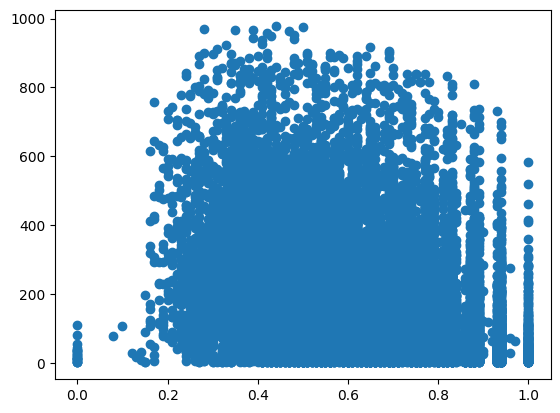

In [79]:
plt.scatter(x='humidity', y='count', data=df)

In [80]:
df_humidity_0 = df.query('humidity == 0.0')
#from 1551 to 1572

# these entries have humidity as 0 but the weather being listed as rainy or misty. Very sus.
# After taking a deeper look I noticed that all data are from the same day. something must be wrong at that day. It is fully reasonable to drop those data.


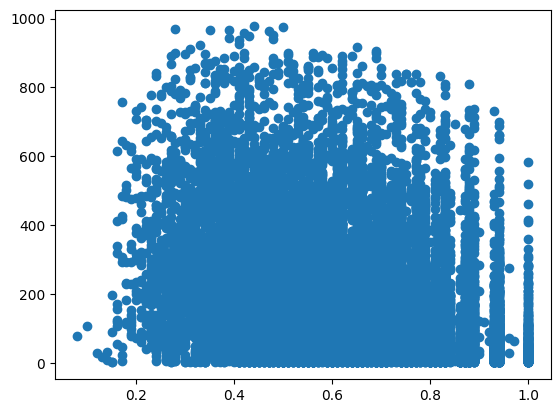

In [82]:
#Let me drop them for better fitting
df = df[df['humidity'] != 0.0]
plt.scatter(x='humidity', y='count', data=df)

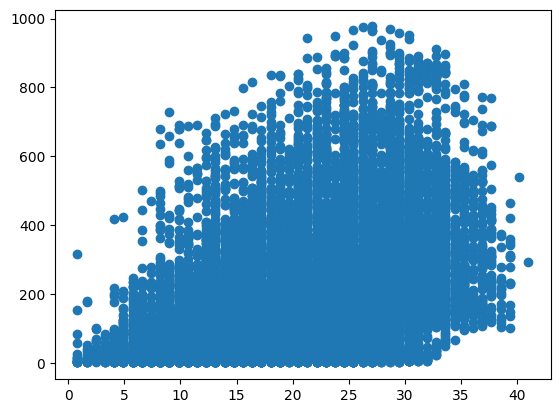

In [83]:
plt.scatter(x='temp', y='count', data=df)

In [84]:
df.query('temp < 1')
# people going to work at 8, it is reasonable to me. (that highest dot near 0 on x-axis is on 8am.)

,season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed,count
483,spring,2011,1,4,0,6,0,misty,0.82,0.760,0.48,19.9995,3
484,spring,2011,1,6,0,6,0,misty,0.82,1.515,0.44,15.0013,2
485,spring,2011,1,7,0,6,0,clear,0.82,0.760,0.44,19.0012,8
486,spring,2011,1,8,0,6,0,clear,0.82,0.000,0.44,22.0028,27
504,spring,2011,1,2,0,0,0,clear,0.82,3.030,0.62,8.9981,18
505,spring,2011,1,3,0,0,0,clear,0.82,3.030,0.62,8.9981,5
528,spring,2011,1,4,0,1,1,clear,0.82,3.030,0.48,8.9981,1
529,spring,2011,1,5,0,1,1,clear,0.82,3.030,0.48,8.9981,5
530,spring,2011,1,6,0,1,1,clear,0.82,3.790,0.48,6.0032,15
531,spring,2011,1,7,0,1,1,clear,0.82,6.060,0.48,0.0000,84


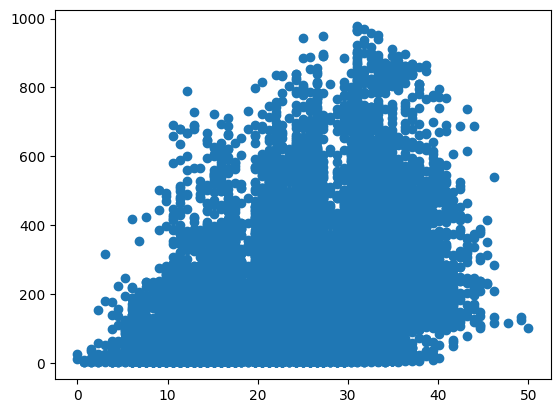

In [85]:
plt.scatter(x='feel_temp', y='count', data=df)

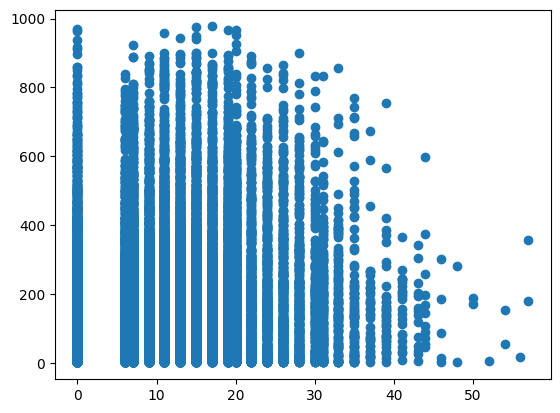

In [86]:
plt.scatter(x='windspeed', y='count', data=df)
#what's going on with windspeed between 1 and maybe 5?

In [59]:
df.query('windspeed == 0')

,season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed,count
0,spring,2011,1,0,0,6,0,clear,9.84,14.395,0.81,0.0,16
1,spring,2011,1,1,0,6,0,clear,9.02,13.635,0.80,0.0,40
2,spring,2011,1,2,0,6,0,clear,9.02,13.635,0.80,0.0,32
3,spring,2011,1,3,0,6,0,clear,9.84,14.395,0.75,0.0,13
4,spring,2011,1,4,0,6,0,clear,9.84,14.395,0.75,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17319,spring,2012,12,12,0,6,0,rain,8.20,12.120,1.00,0.0,48
17320,spring,2012,12,13,0,6,0,rain,8.20,12.120,1.00,0.0,84
17322,spring,2012,12,15,0,6,0,misty,9.84,12.120,0.87,0.0,129
17330,spring,2012,12,23,0,6,0,misty,10.66,12.120,0.60,0.0,32


In [88]:
print("Correlation Matrix (Pearson):")
df_windspeed_0 = df.query('windspeed == 0.0')
corr_matrix = df_windspeed_0[['month','hour','holiday','weekday','workingday', 'temp', 'humidity', 'count']].corr()
print(corr_matrix)

Correlation Matrix (Pearson):
               month      hour   holiday   weekday  workingday      temp  \
month       1.000000  0.003273  0.050382 -0.044930   -0.031367  0.105178   
hour        0.003273  1.000000 -0.004224  0.006620   -0.027680  0.089906   
holiday     0.050382 -0.004224  1.000000 -0.082799   -0.273474  0.031756   
weekday    -0.044930  0.006620 -0.082799  1.000000    0.047463  0.009592   
workingday -0.031367 -0.027680 -0.273474  0.047463    1.000000  0.059482   
temp        0.105178  0.089906  0.031756  0.009592    0.059482  1.000000   
humidity    0.182893 -0.309381 -0.037187 -0.018563    0.051118 -0.173287   
count       0.057257  0.391991 -0.012959  0.025464    0.012132  0.343535   

            humidity     count  
month       0.182893  0.057257  
hour       -0.309381  0.391991  
holiday    -0.037187 -0.012959  
weekday    -0.018563  0.025464  
workingday  0.051118  0.012132  
temp       -0.173287  0.343535  
humidity    1.000000 -0.357994  
count      -0.357994 

In [89]:
df.query('windspeed != 0').sort_values(by='windspeed', ascending=True)

,season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed,count
7409,winter,2011,11,8,0,4,1,misty,16.40,20.455,0.94,6.0032,436
7405,winter,2011,11,4,0,4,1,clear,15.58,19.695,0.94,6.0032,3
7404,winter,2011,11,3,0,4,1,clear,15.58,19.695,0.94,6.0032,11
17308,spring,2012,12,1,0,6,0,misty,9.84,12.120,0.75,6.0032,37
17306,spring,2012,12,23,0,5,1,misty,9.84,12.880,0.65,6.0032,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,spring,2011,2,15,0,5,1,clear,18.86,22.725,0.41,54.0020,55
9956,spring,2012,2,21,0,5,1,clear,17.22,21.210,0.35,54.0020,152
5635,fall,2011,8,17,0,6,0,rain,26.24,28.790,0.89,55.9986,16
4315,fall,2011,7,17,0,0,0,rain,32.80,37.120,0.49,56.9969,358


the sensor might have some rounding problem:
* There is no value between 0 and 6.0032
* The windspeed data are discrete.

__Strategy:__ try to predict the windspeed data below _windspeed==6_ using current dataset.


In [94]:
from sklearn.preprocessing import LabelEncoder

# Apply label encoding to categorical columns
categorical_cols = ['season', 'weather']  # adjust based on your actual columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

C:\Users\Yan\AppData\Local\Temp\ipykernel_1684\1493555083.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zero['windspeed_predicted'] = predicted


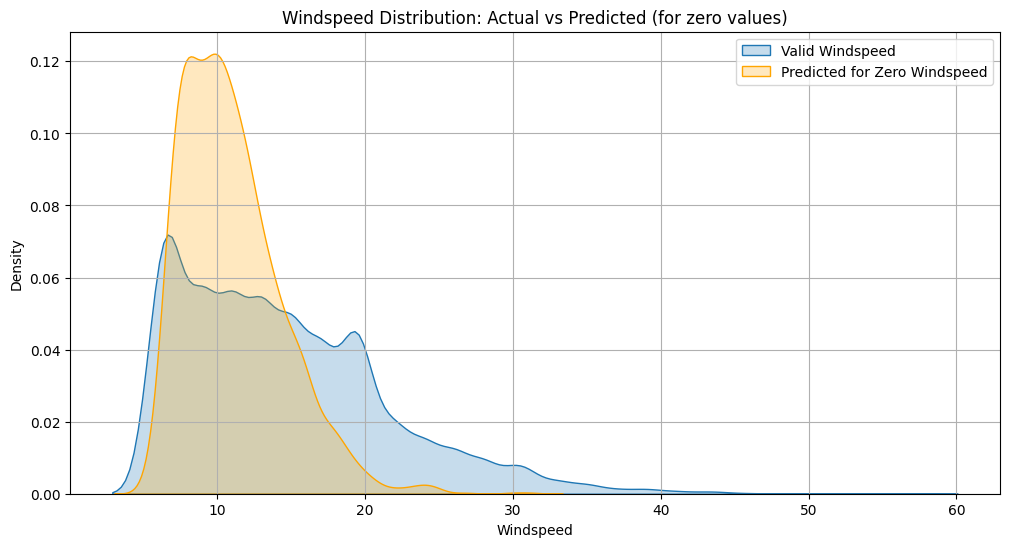

In [95]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Separate the data
df_valid = df[df['windspeed'] != 0]
df_zero = df[df['windspeed'] == 0]

# Features to use for prediction
features = ['season', 'weather', 'humidity', 'hour', 'workingday', 'holiday', 'weekday', 'month','temp', 'feel_temp']

# Train model
X_train = df_valid[features]
y_train = df_valid['windspeed']
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict and replace
X_pred = df_zero[features]
predicted = model.predict(X_pred)

# Optionally add noise
predicted += np.random.normal(0, 0.5, size=predicted.shape)

# Store predicted for visualization
df_zero['windspeed_predicted'] = predicted

# Step 4: Visualization

plt.figure(figsize=(12, 6))

# Plot actual (non-zero) windspeed
sns.kdeplot(df_valid['windspeed'], label='Valid Windspeed', fill=True)

# Plot predicted windspeed
sns.kdeplot(df_zero['windspeed_predicted'], label='Predicted for Zero Windspeed', fill=True, color='orange')

plt.title("Windspeed Distribution: Actual vs Predicted (for zero values)")
plt.xlabel("Windspeed")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

In [97]:
num_zero_windspeed = (df['windspeed'] == 0).sum()
print(f"Number of entries with windspeed == 0: {num_zero_windspeed}")

Number of entries with windspeed == 0: 2180


In [98]:
num_zero_windspeed = (df['windspeed'] == 6.0032).sum()
print(f"Number of entries with windspeed == 6.0032: {num_zero_windspeed}")

Number of entries with windspeed == 6.0032: 1424


In [99]:
num_zero_windspeed = (df['windspeed'] == 7.0015).sum()
print(f"Number of entries with windspeed == 7.0015: {num_zero_windspeed}")

Number of entries with windspeed == 7.0015: 1617


In [100]:
num_zero_windspeed = (df['windspeed'] == 8.9981).sum()
print(f"Number of entries with windspeed == 8.9981: {num_zero_windspeed}")

Number of entries with windspeed == 8.9981: 1737


In [101]:
num_zero_windspeed = (df['windspeed'] == 11.0014).sum()
print(f"Number of entries with windspeed == 11.0014: {num_zero_windspeed}")

Number of entries with windspeed == 11.0014: 1694


In [102]:
num_zero_windspeed = (df['windspeed'] == 12.998).sum()
print(f"Number of entries with windspeed == 12.998: {num_zero_windspeed}")

Number of entries with windspeed == 12.998: 1656


In [107]:
# Only apply to values that are not zero or flawed
non_flawed_mask = df['windspeed'] > 6.0032

# Add small Gaussian noise to make it continuous
np.random.seed(42)
df.loc[non_flawed_mask, 'windspeed'] += np.random.normal(loc=0, scale=0.3, size=non_flawed_mask.sum())

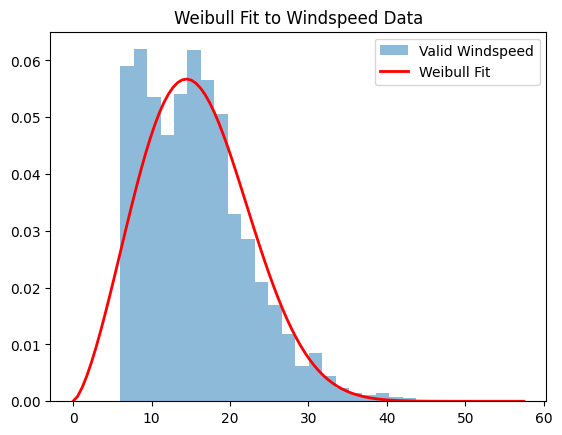

In [108]:
from scipy.stats import weibull_min
# Use valid windspeed values (>6.0032)
valid_ws = df[df['windspeed'] > 6.0032]['windspeed']

# Fit Weibull distribution
shape, loc, scale = weibull_min.fit(valid_ws, floc=0)

# Sample new values
num_flawed = df[df['windspeed'] <= 6.0032].shape[0]
sampled_ws = weibull_min.rvs(shape, loc=loc, scale=scale, size=num_flawed)

# Optional: Clip outliers
sampled_ws = np.clip(sampled_ws, 0.1, df['windspeed'].max())

# Replace the flawed entries
df.loc[df['windspeed'] <= 6.0032, 'windspeed'] = sampled_ws

# Plot to visualize
x = np.linspace(0, valid_ws.max(), 100)
pdf = weibull_min.pdf(x, shape, loc=loc, scale=scale)

plt.hist(valid_ws, bins=30, density=True, alpha=0.5, label='Valid Windspeed')
plt.plot(x, pdf, 'r-', lw=2, label='Weibull Fit')
plt.legend()
plt.title("Weibull Fit to Windspeed Data")
plt.show()

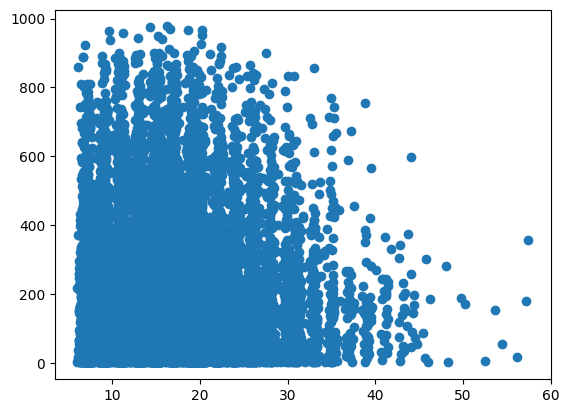

In [109]:
# Step 3: Sample new values for flawed entries
num_flawed = df[df['windspeed'] <= 6.0032].shape[0]
sampled_windspeeds = np.random.normal(mu, std, num_flawed)

# Clip to reasonable bounds (optional)
sampled_windspeeds = np.clip(sampled_windspeeds, 0.1, df['windspeed'].max())

# Step 4: Replace the flawed values
df.loc[df['windspeed'] <= 6.0032, 'windspeed'] = sampled_windspeeds

plt.scatter(x='windspeed', y='count', data=df)